In [7]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import stats as st
import statistics as stat
image_data = nib.load('../images/Flair.nii.gz').get_fdata()
image_data_v2 = nib.load('../images/T1_V2.nii.gz').get_fdata()

(array([4.3730e+04, 3.0271e+04, 2.6889e+04, 2.6018e+04, 2.6605e+04,
        2.7281e+04, 2.7453e+04, 2.6781e+04, 2.6238e+04, 2.5849e+04,
        2.5512e+04, 2.5451e+04, 2.4922e+04, 2.5717e+04, 2.8350e+04,
        3.5109e+04, 4.4880e+04, 5.4263e+04, 5.9666e+04, 6.1248e+04,
        5.6526e+04, 4.7670e+04, 3.7735e+04, 2.8572e+04, 2.1110e+04,
        1.4631e+04, 1.0849e+04, 7.9790e+03, 6.5920e+03, 5.4990e+03,
        5.0160e+03, 4.6430e+03, 4.3600e+03, 4.0520e+03, 4.0850e+03,
        3.7190e+03, 3.6810e+03, 3.5690e+03, 3.5070e+03, 3.3920e+03,
        3.2680e+03, 3.2040e+03, 3.2410e+03, 3.1540e+03, 3.1760e+03,
        3.0400e+03, 3.2020e+03, 3.0490e+03, 2.9560e+03, 2.7130e+03,
        2.6290e+03, 2.5700e+03, 2.3670e+03, 2.2440e+03, 2.1510e+03,
        2.0090e+03, 1.8610e+03, 1.7470e+03, 1.6220e+03, 1.4440e+03,
        1.4500e+03, 1.2690e+03, 1.1800e+03, 1.0880e+03, 9.5300e+02,
        8.2800e+02, 7.1200e+02, 5.3100e+02, 4.9000e+02, 4.0800e+02,
        3.4200e+02, 2.8900e+02, 2.3400e+02, 1.70

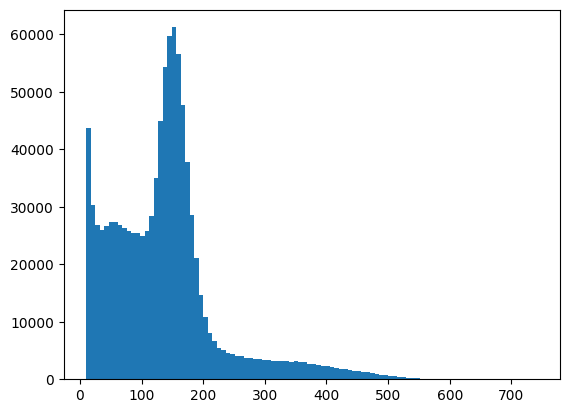

In [8]:
plt.hist(image_data[image_data>10].flatten(), 100)

In [9]:
def divide_histogram(image):
    # 1. Calcular el histograma de la imagen
    histogram = np.histogram(image, bins=256, range=(0, 255))[0]

    # 2. Dividir el histograma en tres secciones
    section_size = len(histogram) // 3
    section3 = histogram[2 * section_size:]

    peak3 = np.argmax(section3)
    ws = peak3 + 2 * section_size

    image_data_rescaled = (image / ws)

    # 4. Visualizar el histograma con el último pico escogido
    plt.hist(image[image>10].flatten(), 100)
    plt.axvline(peak3 + 2 * section_size, color='red', linestyle='--', label='Último Pico')
    plt.show()

    return image_data_rescaled


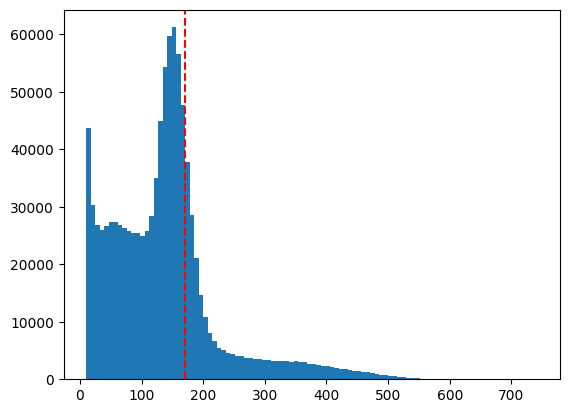

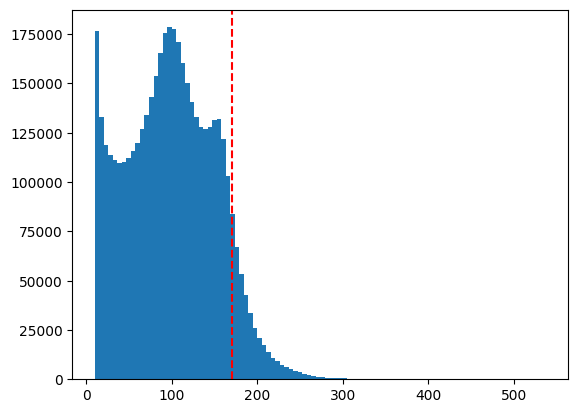

In [10]:
image_data_rescaled = divide_histogram(image_data)
image_data_rescaled_v2 = divide_histogram(image_data_v2)

Text(0.5, 1.0, 'Original')

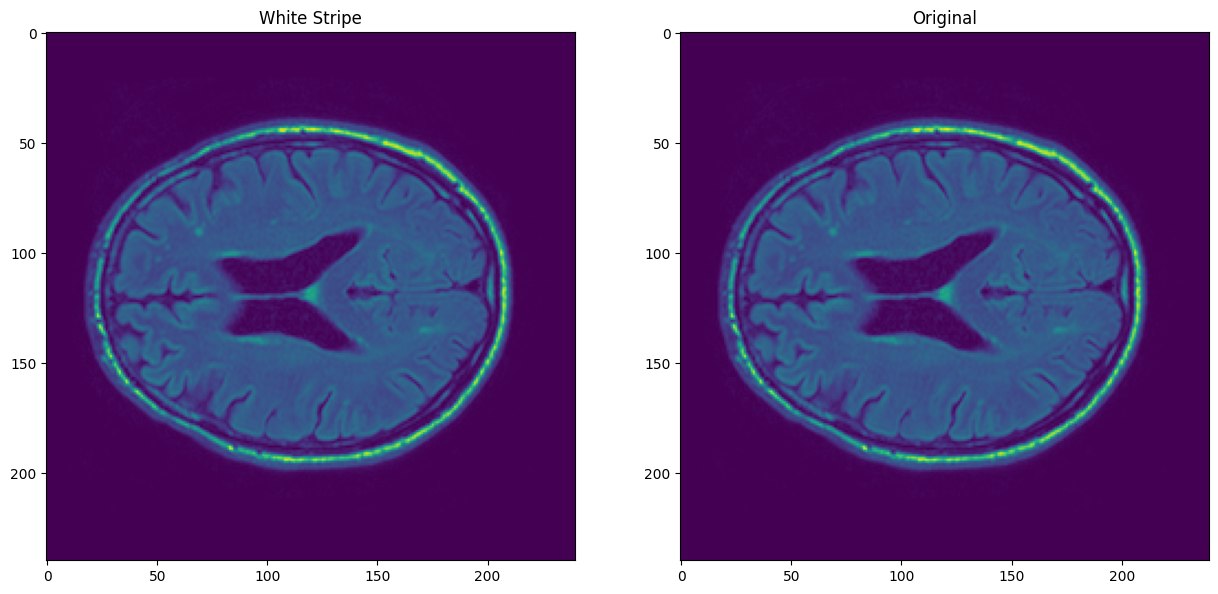

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.imshow(image_data_rescaled[:,:,25])
ax1.set_title('White Stripe')
ax2.imshow(image_data[:,:,25])
ax2.set_title('Original')

(array([6.09896e+05, 2.32100e+05, 1.52663e+05, 1.26631e+05, 1.17752e+05,
        1.13967e+05, 1.11850e+05, 1.11719e+05, 1.12714e+05, 1.15834e+05,
        1.19854e+05, 1.25887e+05, 1.33685e+05, 1.41480e+05, 1.52003e+05,
        1.64632e+05, 1.75200e+05, 1.80893e+05, 1.81553e+05, 1.76110e+05,
        1.66162e+05, 1.55226e+05, 1.44335e+05, 1.36128e+05, 1.31067e+05,
        1.28637e+05, 1.29587e+05, 1.33171e+05, 1.34487e+05, 1.25355e+05,
        1.06512e+05, 8.66530e+04, 6.91020e+04, 5.51750e+04, 4.35220e+04,
        3.41740e+04, 2.63840e+04, 2.12560e+04, 1.73180e+04, 1.39590e+04,
        1.09860e+04, 9.16500e+03, 7.43600e+03, 6.18900e+03, 5.08500e+03,
        4.22300e+03, 3.36700e+03, 2.60200e+03, 2.14700e+03, 1.64800e+03,
        1.27900e+03, 1.04200e+03, 8.51000e+02, 7.09000e+02, 6.04000e+02,
        5.16000e+02, 3.88000e+02, 3.64000e+02, 2.78000e+02, 2.53000e+02,
        2.21000e+02, 2.05000e+02, 1.36000e+02, 1.31000e+02, 1.25000e+02,
        8.70000e+01, 7.40000e+01, 8.10000e+01, 7.30

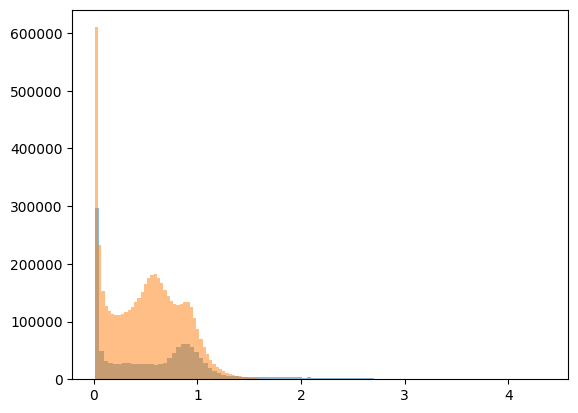

In [12]:
plt.hist(image_data_rescaled[image_data_rescaled>0.01].flatten(),100, alpha=0.5)
plt.hist(image_data_rescaled_v2[image_data_rescaled_v2>0.01].flatten(),100, alpha=0.5)